<h1 style="text-align:center;font-size:30px;color:darkblue;">Model Implementation (By self Model Implementation) 👇</h1>

# imports

In [1]:
import tensorflow
import numpy
from matplotlib import pyplot
import os
import pickle
import keras
from sklearn.metrics import confusion_matrix,classification_report
from keras.utils.vis_utils import plot_model
import seaborn

## Configurations

In [2]:
# %matplotlib qt;
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (5, 3)

In [3]:
Data_Path="../Data/Main_Data"

In [4]:
Training_Data_Ratio=0.8

In [5]:
class_list=os.listdir(Data_Path)

In [6]:
class_list

['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']

In [7]:
Object_Data_Path="../Data/Preprocessed_Data/"

In [8]:
pickle_training_features=open(Object_Data_Path+"pickle_training_features.pickle","rb")
Training_Features=pickle.load(pickle_training_features)
pickle_training_features.close()
pickle_training_labels=open(Object_Data_Path+"pickle_training_labels.pickle","rb")
Training_Label=pickle.load(pickle_training_labels)
pickle_training_labels.close()

In [9]:
pickle_testing_features=open(Object_Data_Path+"pickle_testing_features.pickle","rb")
Testing_Features=pickle.load(pickle_testing_features)
pickle_testing_features.close()
pickle_testing_labels=open(Object_Data_Path+"pickle_testing_labels.pickle","rb")
Testing_Label=pickle.load(pickle_testing_labels)
pickle_testing_labels.close()

In [10]:
Training_Features.shape

(1920, 50)

In [11]:
Training_Label.shape

(1920,)

In [12]:
Testing_Features.shape

(480, 50)

In [13]:
Testing_Label.shape

(480,)

In [17]:
input_dimension=Training_Features[0].shape

In [18]:
input_dimension

(50, 1)

## Praparing Data for Training

In [14]:
Training_Features=numpy.expand_dims(Training_Features,axis=-1)
Testing_Features=numpy.expand_dims(Testing_Features,axis=-1)

In [15]:
Training_Features.shape

(1920, 50, 1)

In [16]:
Testing_Features.shape

(480, 50, 1)

# Model Definition

In [19]:
Model=keras.models.Sequential([
         keras.layers.LSTM(units=256, return_sequences=False, input_shape=input_dimension),
         keras.layers.Dense(units=256, activation='relu'),
         keras.layers.Dense(units=64, activation='relu'),
         keras.layers.Dense(units=len(class_list), activation='softmax')
    ]
 )

In [22]:
Model.summary(expand_nested=True,show_trainable=True,)

Model: "sequential"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 lstm (LSTM)                 (None, 256)               264192    Y          
                                                                            
 dense (Dense)               (None, 256)               65792     Y          
                                                                            
 dense_1 (Dense)             (None, 64)                16448     Y          
                                                                            
 dense_2 (Dense)             (None, 6)                 390       Y          
                                                                            
Total params: 346,822
Trainable params: 346,822
Non-trainable params: 0
____________________________________________________________________________


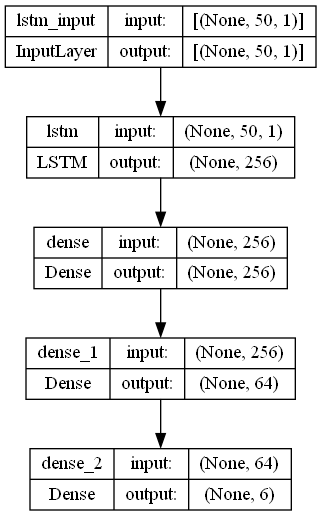

In [21]:
plot_model(Model, to_file='defined_model_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
Model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [24]:
checkpoint_history=Model.fit(
    Training_Features,Training_Label,
    epochs=10,
    verbose=1,
    validation_data=(Testing_Features,Testing_Label)
)

Epoch 1/10
60/60 [==============================] - 8s 101ms/step - loss: 0.9793 - accuracy: 0.6057 - val_loss: 0.4578 - val_accuracy: 0.8271
Epoch 2/10
60/60 [==============================] - 6s 93ms/step - loss: 0.3836 - accuracy: 0.8557 - val_loss: 0.2216 - val_accuracy: 0.9271
Epoch 3/10
60/60 [==============================] - 6s 94ms/step - loss: 0.3174 - accuracy: 0.8859 - val_loss: 0.2739 - val_accuracy: 0.8833
Epoch 4/10
60/60 [==============================] - 6s 108ms/step - loss: 0.2008 - accuracy: 0.9260 - val_loss: 0.1835 - val_accuracy: 0.9500
Epoch 5/10
60/60 [==============================] - 7s 112ms/step - loss: 0.1968 - accuracy: 0.9354 - val_loss: 0.1230 - val_accuracy: 0.9667
Epoch 6/10
60/60 [==============================] - 7s 112ms/step - loss: 0.1620 - accuracy: 0.9438 - val_loss: 0.0797 - val_accuracy: 0.9729
Epoch 7/10
60/60 [==============================] - 7s 110ms/step - loss: 0.1386 - accuracy: 0.9531 - val_loss: 0.1796 - val_accuracy: 0.9187
Epoch 8/

## Evaluation

In [25]:
Testing_Predictions=Model.predict(Testing_Features)

15/15 [==============================] - 1s 40ms/step


In [26]:
Testing_Predictions[0]

array([1.3248963e-04, 2.5426184e-03, 4.5233690e-05, 9.2937291e-04,
       5.6453854e-07, 9.9634969e-01], dtype=float32)

In [27]:
numpy.argmax(Testing_Predictions[0])

5

In [28]:
Testing_Label[0]

5

In [29]:
classification_data=confusion_matrix(
    [class_list[i] for i in Testing_Label],
    [class_list[numpy.argmax(prediction)] for prediction in Testing_Predictions]
)

In [30]:
classification_data

array([[78,  0,  0,  1,  0,  0],
       [ 0, 72,  0,  0,  0,  0],
       [ 0,  0, 97,  0,  0,  0],
       [ 1,  0,  0, 60,  0, 12],
       [ 0,  0,  0,  0, 75,  0],
       [ 0,  0,  0,  0,  0, 84]], dtype=int64)

<AxesSubplot: >

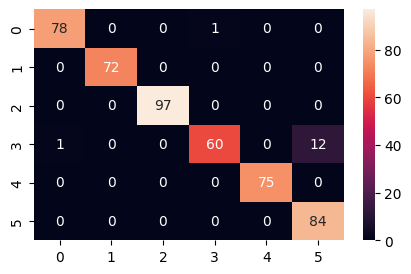

In [31]:
seaborn.heatmap(classification_data,annot=True)

In [32]:
print(classification_report(
    [class_list[i] for i in Testing_Label],
    [class_list[numpy.argmax(prediction)] for prediction in Testing_Predictions]
))

              precision    recall  f1-score   support

       angry       0.99      0.99      0.99        79
     disgust       1.00      1.00      1.00        72
        fear       1.00      1.00      1.00        97
       happy       0.98      0.82      0.90        73
         sad       1.00      1.00      1.00        75
    surprise       0.88      1.00      0.93        84

    accuracy                           0.97       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.97      0.97      0.97       480



In [33]:
Model.save("./Models/DefinedModel.h5")

# Model Saving

In [34]:
Model.save("../Model/DefinedModel.h5")